# Logistic Regression with Python

For this lecture we will be working with the Titanic. This is a very famous data set and very often is a student's first step in machine learning!

We'll be trying to predict a classification- survival or deceased.
Let's begin our understanding of implementing Logistic Regression in Python for classification.

We'll use a "semi-cleaned" version of the titanic data set, if you use the data set hosted directly on Kaggle, you may need to do some additional cleaning not shown in this lecture notebook.

## Import Libraries
Let's import some libraries to get started!

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

import titanic dataset in dataframe

In [ ]:
df_titanic = sns.load_dataset('titanic')

In [ ]:
type(df_titanic)

pandas.core.frame.DataFrame

In [ ]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
df_titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [ ]:
df_titanic['survived'].unique()

array([0, 1])

Data Pre-processing


1.   Fill , remove NaN Value
2.   Remove non-numeric columns / convert non-numeric columns to numeric data
3. Discard those columns which are non-correlated with target column
4. split data in x (independent columns values) and y (target column)
5. split data in train , test sets
6. pass data to algo for prediction



There are three columns which contain NaN values:


1. embark_town, remove 2 records which conatin NaN values
2.  embarked, remove 2 records which conatin NaN values
3. deck, remove (drop) as majority of values are NaN
4. age, fill NaN values




In [ ]:
df_titanic = df_titanic[df_titanic.embark_town.isna()==False]

In [ ]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     889 non-null    int64   
 1   pclass       889 non-null    int64   
 2   sex          889 non-null    object  
 3   age          712 non-null    float64 
 4   sibsp        889 non-null    int64   
 5   parch        889 non-null    int64   
 6   fare         889 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        889 non-null    category
 9   who          889 non-null    object  
 10  adult_male   889 non-null    bool    
 11  deck         201 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        889 non-null    object  
 14  alone        889 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 87.3+ KB


In [ ]:
df_titanic.drop("deck", axis=1, inplace=True)

In [ ]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     889 non-null    int64   
 1   pclass       889 non-null    int64   
 2   sex          889 non-null    object  
 3   age          712 non-null    float64 
 4   sibsp        889 non-null    int64   
 5   parch        889 non-null    int64   
 6   fare         889 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        889 non-null    category
 9   who          889 non-null    object  
 10  adult_male   889 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        889 non-null    object  
 13  alone        889 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 86.1+ KB


In [ ]:
889-712

177

age, fill NaN values

In [ ]:
df_titanic['age'].mean()

29.64209269662921

In [ ]:
df_titanic.corr()

<ipython-input-120-3e801442ae71>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_titanic.corr()


,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.335549,-0.082446,-0.034040,0.083151,0.255290,-0.555520,-0.206207
pclass,-0.335549,1.000000,-0.365902,0.081656,0.016824,-0.548193,0.090098,0.138553
age,-0.082446,-0.365902,1.000000,-0.307351,-0.187896,0.093143,0.286543,0.195766
sibsp,-0.034040,0.081656,-0.307351,1.000000,0.414542,0.160887,-0.255401,-0.584186
parch,0.083151,0.016824,-0.187896,0.414542,1.000000,0.217532,-0.351945,-0.583112
fare,0.255290,-0.548193,0.093143,0.160887,0.217532,1.000000,-0.179851,-0.274079
adult_male,-0.555520,0.090098,0.286543,-0.255401,-0.351945,-0.179851,1.000000,0.407992
alone,-0.206207,0.138553,0.195766,-0.584186,-0.583112,-0.274079,0.407992,1.000000


In [ ]:
df_titanic['pclass'].unique()

array([3, 1, 2])

In [ ]:
df_titanic.groupby('pclass').mean()

<ipython-input-122-a150fd93be50>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_titanic.groupby('pclass').mean()


,survived,age,sibsp,parch,fare,adult_male,alone
pclass,,,,,,,
1,0.626168,38.105543,0.420561,0.359813,84.193516,0.556075,0.500000
2,0.472826,29.877630,0.402174,0.380435,20.662183,0.538043,0.565217
3,0.242363,25.140620,0.615071,0.393075,13.675550,0.649695,0.659878


In [ ]:
def impute_age(cols):
    age = cols[0]
    pclass = cols[1]
    if pd.isnull(age):
      if pclass == 1:
        return 38
      elif pclass == 2:
        return 30
      else:
        return 25
    else:
      return age

In [ ]:
df_titanic['age'] = df_titanic[['age','pclass']].apply(impute_age,axis=1)

In [ ]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     889 non-null    int64   
 1   pclass       889 non-null    int64   
 2   sex          889 non-null    object  
 3   age          889 non-null    float64 
 4   sibsp        889 non-null    int64   
 5   parch        889 non-null    int64   
 6   fare         889 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        889 non-null    category
 9   who          889 non-null    object  
 10  adult_male   889 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        889 non-null    object  
 13  alone        889 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 86.1+ KB


Remove non-numeric columns / convert non-numeric columns to numeric data

In [ ]:
df_titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
5,0,3,male,25.0,0,0,8.4583,Q,Third,man,True,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,Cherbourg,yes,False


<Axes: xlabel='sex', ylabel='count'>

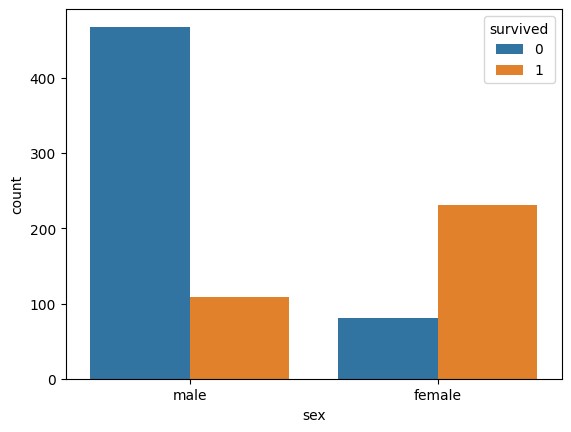

In [ ]:
sns.countplot(data=df_titanic,x='sex',hue='survived')

List of non-numeric columns


1.   sex - convert this column from non-numeric to numeric values
2.   embarked - convert this column from non-numeric to numeric values
3. class - we will discard (drop) this column , as we have its numeric alternate column named pclass
4. who - convert this column from non-numeric to numeric values
5. adult_male - we will discard (drop) this column , as we have its numeric alternate columns combination named sex and who
6. embark_town - convert this column from non-numeric to numeric values
7. alive - we will discard (drop) this column , as we have its numeric alternate column named survived
8. alone - convert this column from non-numeric to numeric values



In [ ]:
df_titanic.drop(['class','adult_male','alive'],axis=1,inplace=True)

In [ ]:
df1 = pd.get_dummies(df_titanic.sex)
df_titanic = pd.concat([df_titanic,df1], axis =1 )
df_titanic.pop("sex")
df_titanic.head()

,survived,pclass,age,sibsp,parch,fare,embarked,who,embark_town,alone,female,male
0,0,3,22.0,1,0,7.2500,S,man,Southampton,False,0,1
1,1,1,38.0,1,0,71.2833,C,woman,Cherbourg,False,1,0
2,1,3,26.0,0,0,7.9250,S,woman,Southampton,True,1,0
3,1,1,35.0,1,0,53.1000,S,woman,Southampton,False,1,0
4,0,3,35.0,0,0,8.0500,S,man,Southampton,True,0,1


In [ ]:
df_titanic.corr()

<ipython-input-130-3e801442ae71>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_titanic.corr()


,survived,pclass,age,sibsp,parch,fare,alone,female,male
survived,1.000000,-0.335549,-0.054934,-0.034040,0.083151,0.255290,-0.206207,0.541585,-0.541585
pclass,-0.335549,1.000000,-0.401322,0.081656,0.016824,-0.548193,0.138553,-0.127741,0.127741
age,-0.054934,-0.401322,1.000000,-0.242834,-0.174280,0.118205,0.168213,-0.085564,0.085564
sibsp,-0.034040,0.081656,-0.242834,1.000000,0.414542,0.160887,-0.584186,0.116348,-0.116348
parch,0.083151,0.016824,-0.174280,0.414542,1.000000,0.217532,-0.583112,0.247508,-0.247508
fare,0.255290,-0.548193,0.118205,0.160887,0.217532,1.000000,-0.274079,0.179958,-0.179958
alone,-0.206207,0.138553,0.168213,-0.584186,-0.583112,-0.274079,1.000000,-0.306985,0.306985
female,0.541585,-0.127741,-0.085564,0.116348,0.247508,0.179958,-0.306985,1.000000,-1.000000
male,-0.541585,0.127741,0.085564,-0.116348,-0.247508,-0.179958,0.306985,-1.000000,1.000000


In [ ]:
df1 = pd.get_dummies(df_titanic.embarked)
df_titanic = pd.concat([df_titanic,df1], axis =1 )
df_titanic.pop("embarked")
df_titanic.head()

,survived,pclass,age,sibsp,parch,fare,who,embark_town,alone,female,male,C,Q,S
0,0,3,22.0,1,0,7.2500,man,Southampton,False,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,woman,Cherbourg,False,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,woman,Southampton,True,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,woman,Southampton,False,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,man,Southampton,True,0,1,0,0,1


In [ ]:
df_titanic['embark_town'].unique()

array(['Southampton', 'Cherbourg', 'Queenstown'], dtype=object)

In [ ]:
df_titanic.corr()

<ipython-input-133-3e801442ae71>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_titanic.corr()


,survived,pclass,age,sibsp,parch,fare,alone,female,male,C,Q,S
survived,1.000000,-0.335549,-0.054934,-0.034040,0.083151,0.255290,-0.206207,0.541585,-0.541585,0.169966,0.004536,-0.151777
pclass,-0.335549,1.000000,-0.401322,0.081656,0.016824,-0.548193,0.138553,-0.127741,0.127741,-0.245733,0.220558,0.076466
age,-0.054934,-0.401322,1.000000,-0.242834,-0.174280,0.118205,0.168213,-0.085564,0.085564,0.043681,-0.070847,0.006325
sibsp,-0.034040,0.081656,-0.242834,1.000000,0.414542,0.160887,-0.584186,0.116348,-0.116348,-0.060074,-0.026692,0.069438
parch,0.083151,0.016824,-0.174280,0.414542,1.000000,0.217532,-0.583112,0.247508,-0.247508,-0.011588,-0.081585,0.061512
fare,0.255290,-0.548193,0.118205,0.160887,0.217532,1.000000,-0.274079,0.179958,-0.179958,0.270731,-0.116684,-0.163758
alone,-0.206207,0.138553,0.168213,-0.584186,-0.583112,-0.274079,1.000000,-0.306985,0.306985,-0.094513,0.087099,0.027982
female,0.541585,-0.127741,-0.085564,0.116348,0.247508,0.179958,-0.306985,1.000000,-1.000000,0.084520,0.075217,-0.121405
male,-0.541585,0.127741,0.085564,-0.116348,-0.247508,-0.179958,0.306985,-1.000000,1.000000,-0.084520,-0.075217,0.121405
C,0.169966,-0.245733,0.043681,-0.060074,-0.011588,0.270731,-0.094513,0.084520,-0.084520,1.000000,-0.148646,-0.782613


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_titanic['embark_town']  = le.fit_transform(df_titanic['embark_town'])

In [ ]:
df_titanic.head(5)

,survived,pclass,age,sibsp,parch,fare,who,embark_town,alone,female,male,C,Q,S
0,0,3,22.0,1,0,7.2500,man,2,False,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,woman,0,False,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,woman,2,True,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,woman,2,False,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,man,2,True,0,1,0,0,1


In [ ]:
df_titanic.corr()

<ipython-input-136-3e801442ae71>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_titanic.corr()


,survived,pclass,age,sibsp,parch,fare,embark_town,alone,female,male,C,Q,S
survived,1.000000,-0.335549,-0.054934,-0.034040,0.083151,0.255290,-0.169718,-0.206207,0.541585,-0.541585,0.169966,0.004536,-0.151777
pclass,-0.335549,1.000000,-0.401322,0.081656,0.016824,-0.548193,0.164681,0.138553,-0.127741,0.127741,-0.245733,0.220558,0.076466
age,-0.054934,-0.401322,1.000000,-0.242834,-0.174280,0.118205,-0.018031,0.168213,-0.085564,0.085564,0.043681,-0.070847,0.006325
sibsp,-0.034040,0.081656,-0.242834,1.000000,0.414542,0.160887,0.068900,-0.584186,0.116348,-0.116348,-0.060074,-0.026692,0.069438
parch,0.083151,0.016824,-0.174280,0.414542,1.000000,0.217532,0.040449,-0.583112,0.247508,-0.247508,-0.011588,-0.081585,0.061512
fare,0.255290,-0.548193,0.118205,0.160887,0.217532,1.000000,-0.226311,-0.274079,0.179958,-0.179958,0.270731,-0.116684,-0.163758
embark_town,-0.169718,0.164681,-0.018031,0.068900,0.040449,-0.226311,1.000000,0.062532,-0.110320,0.110320,-0.936244,-0.208278,0.951435
alone,-0.206207,0.138553,0.168213,-0.584186,-0.583112,-0.274079,0.062532,1.000000,-0.306985,0.306985,-0.094513,0.087099,0.027982
female,0.541585,-0.127741,-0.085564,0.116348,0.247508,0.179958,-0.110320,-0.306985,1.000000,-1.000000,0.084520,0.075217,-0.121405
male,-0.541585,0.127741,0.085564,-0.116348,-0.247508,-0.179958,0.110320,0.306985,-1.000000,1.000000,-0.084520,-0.075217,0.121405


In [ ]:
df_titanic.head()

,survived,pclass,age,sibsp,parch,fare,who,embark_town,alone,female,male,C,Q,S
0,0,3,22.0,1,0,7.2500,man,2,False,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,woman,0,False,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,woman,2,True,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,woman,2,False,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,man,2,True,0,1,0,0,1


In [ ]:
df_titanic['who'].unique()

array(['man', 'woman', 'child'], dtype=object)

In [ ]:
df_titanic['alone'].unique()

array([False,  True])

In [ ]:
df_titanic['who']  = le.fit_transform(df_titanic['who'])
df_titanic['alone']  = le.fit_transform(df_titanic['alone'])

In [ ]:
df_titanic.head()

,survived,pclass,age,sibsp,parch,fare,who,embark_town,alone,female,male,C,Q,S
0,0,3,22.0,1,0,7.2500,1,2,0,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,2,0,0,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,2,2,1,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,2,2,0,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,2,1,0,1,0,0,1


In [ ]:
df_titanic.corr()

,survived,pclass,age,sibsp,parch,fare,who,embark_town,alone,female,male,C,Q,S
survived,1.000000,-0.335549,-0.054934,-0.034040,0.083151,0.255290,0.323191,-0.169718,-0.206207,0.541585,-0.541585,0.169966,0.004536,-0.151777
pclass,-0.335549,1.000000,-0.401322,0.081656,0.016824,-0.548193,-0.193029,0.164681,0.138553,-0.127741,0.127741,-0.245733,0.220558,0.076466
age,-0.054934,-0.401322,1.000000,-0.242834,-0.174280,0.118205,0.340322,-0.018031,0.168213,-0.085564,0.085564,0.043681,-0.070847,0.006325
sibsp,-0.034040,0.081656,-0.242834,1.000000,0.414542,0.160887,-0.134887,0.068900,-0.584186,0.116348,-0.116348,-0.060074,-0.026692,0.069438
parch,0.083151,0.016824,-0.174280,0.414542,1.000000,0.217532,-0.054389,0.040449,-0.583112,0.247508,-0.247508,-0.011588,-0.081585,0.061512
fare,0.255290,-0.548193,0.118205,0.160887,0.217532,1.000000,0.143849,-0.226311,-0.274079,0.179958,-0.179958,0.270731,-0.116684,-0.163758
who,0.323191,-0.193029,0.340322,-0.134887,-0.054389,0.143849,1.000000,-0.066062,0.004125,0.638309,-0.638309,0.033168,0.093603,-0.087985
embark_town,-0.169718,0.164681,-0.018031,0.068900,0.040449,-0.226311,-0.066062,1.000000,0.062532,-0.110320,0.110320,-0.936244,-0.208278,0.951435
alone,-0.206207,0.138553,0.168213,-0.584186,-0.583112,-0.274079,0.004125,0.062532,1.000000,-0.306985,0.306985,-0.094513,0.087099,0.027982
female,0.541585,-0.127741,-0.085564,0.116348,0.247508,0.179958,0.638309,-0.110320,-0.306985,1.000000,-1.000000,0.084520,0.075217,-0.121405


In [ ]:
df_titanic_temp = df_titanic[['pclass','male','survived']]

Great! Our data is ready for our model!

# Building a Logistic Regression model

Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).

## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(df_titanic.drop('survived',axis=1),df_titanic['survived'],test_size=.2)

In [ ]:
x_train_temp,x_test_temp,y_train_temp,y_test_temp = train_test_split(df_titanic_temp.drop('survived',axis=1),df_titanic_temp['survived'],test_size=.2)

In [ ]:
df_titanic.shape

(889, 14)

In [ ]:
x_train.shape

(711, 13)

In [ ]:
y_test.shape

(178,)

## Training and Predicting

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logr = LogisticRegression()

In [ ]:
logr.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = logr.predict(x_test)

In [ ]:
y_pred

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0])

In [ ]:
y_test

730    1
359    1
637    0
569    1
818    0
      ..
790    0
412    1
395    0
680    0
643    1
Name: survived, Length: 178, dtype: int64

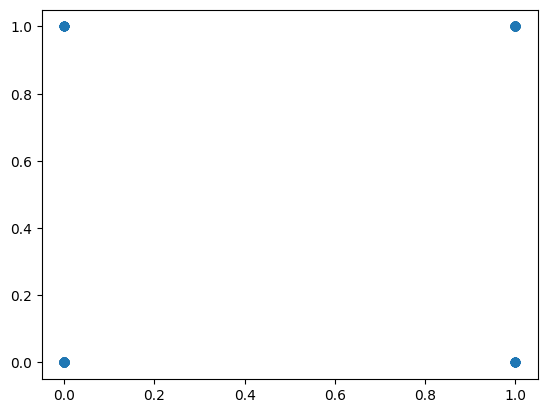

In [ ]:
plt.scatter(y_pred,y_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
confusion_matrix(y_pred,y_test)

array([[90, 13],
       [20, 55]])

In [ ]:
((90+55)/178)*100

81.46067415730337

In [ ]:
accuracy_score(y_pred,y_test)*100

81.46067415730337

In [ ]:
logr_temp = LogisticRegression()

In [ ]:
logr_temp.fit(x_train_temp,y_train_temp)

LogisticRegression()

In [ ]:
y_pred_temp = logr_temp.predict(x_test_temp)

In [ ]:
confusion_matrix(y_pred_temp,y_test_temp)

array([[91, 28],
       [12, 47]])

In [ ]:
accuracy_score(y_pred_temp,y_test_temp)*100

77.52808988764045

In [ ]:
df_titanic.head(2)

,survived,pclass,age,sibsp,parch,fare,who,embark_town,alone,female,male,C,Q,S
0,0,3,22.0,1,0,7.2500,1,2,0,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,2,0,0,1,0,1,0,0


In [ ]:
y_pred[0:10]

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 1])

In [ ]:
y_test[0:10]

730    1
359    1
637    0
569    1
818    0
726    1
549    1
197    0
37     0
855    1
Name: survived, dtype: int64